In [5]:
from pprint import pprint
import seaborn as sns
import numpy as np
import sqlalchemy as sql
from matplotlib import pyplot as plt
import pickle
import logging

from utils.data_storage.dataframe2sql import read_pkl_sql
from utils.config.loaders import get_sql_types

sns.set_theme()

In [6]:
ls *.db

benchmarks.db        debug.db                  hp_scans_iflow.db  sine.db
benchmarks-debug.db  hp_scans_checkerboard.db  pretty_plots.db


In [8]:
pprint(sql.create_engine("sqlite:///pretty_plots.db").table_names())
dtypes = get_sql_types()
dtypes["value_history"] = sql.PickleType

['camel']


In [61]:
df = read_pkl_sql("pretty_plots.db", "camel", dtypes=dtypes)
df = df.dropna(subset=["variance_ratio", "s"]).sort_values("variance_ratio", ascending=False)
df["d_cat"] = df["d"].astype(str)

In [46]:
print(df["variance_ratio"].apply(type).unique())
print(df["s"].apply(type).unique())

[<class 'float'>]
[<class 'float'>]


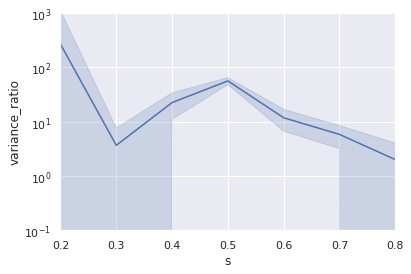

In [56]:
ax = sns.lineplot(data=df[df["d"]==16], x="s", y="variance_ratio", ci="sd")
ax.set(yscale="log", xlim=[0.2, 0.8], ylim=[1.e-1, 1.e3])
plt.show()

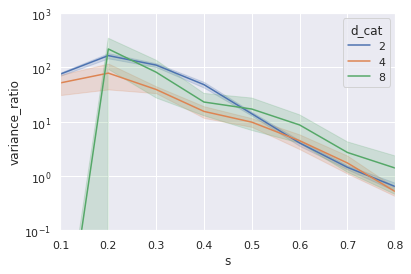

In [54]:
ax = sns.lineplot(data=df[df["d"]!=16], x="s", y="variance_ratio", hue="d_cat", ci="sd")
ax.set(yscale="log", xlim=[0.1, 0.8], ylim=[1.e-1, 1.e3])
plt.show()

In [86]:
baddf = df[(df["d"] == 16 ) & (df["s"]== 0.1)].reset_index()

In [87]:
baddf.columns

Index(['index', 'value', 'target', 'value_std', 'target_std', 'sigma_cutoff',
       'sigmas_off', 'percent_difference', 'variance_ratio', 'match',
       'value_history', 'target_history', 'flat_variance_ratio', 'flow',
       'd_hidden', 'n_bins', 'n_hidden', 'masking', 'repetitions', 'loss',
       'n_points_survey', 'n_iter', 'minibatch_size', 'max_reloads',
       'n_epochs', 'optim_cls', 'betas', 'eps', 'lr', 'checkpoint',
       'checkpoint_on_cuda', 's', 'norm', 'd', 'git_info', 'extra_data',
       'd_cat'],
      dtype='object')

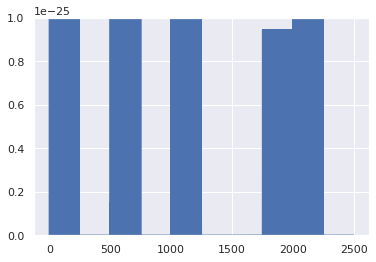

In [105]:
fig, ax = plt.subplots()
ax.plot(sum([row["training record"]["metrics"]["loss"] for _, row in baddf["value_history"][8].iterrows()], []))
ax.set(ylim=[0, 1.e-25])
plt.show()

In [104]:
baddf["value_history"][0].iloc[8]["training record"]['best_loss']

2.429552219787253e-38